# A mega-sena e a ciência da sorte

Um evento canônico em muitos lares pelo Brasil é reunir a turma na sala pra ver os resultados da "mega da virada". Enquanto a coisa toda acontece na televisão, as pessoas vão sonhando com o que vão fazer com todo aquele montante financeiro: onde vão morar, no que vão investir, pra onde vão viajar, o que vão dizer no trabalho, ou mesmo se vão sumir do mapa e guardar a sorte em segredo! Sempre tem aquele tio que promete "colocar tudo na renda fixa" e levar uma vida de sultão, ou mesmo aquele outro que promete abrir inúmeras ONGs e acabar com algum drama humano real. Eu confesso que sou daqueles mais discretos, que prefere a via que me oferece viver da riqueza em segredo e me apoiar num storytelling convincente que sustente o fato de eu abandonar o trabalho formal.

O mais cômico é que após o ápice dessa epifania imaginativa, todo o Brasil cai em si novamente, nas vidas concretas, nas angústias comuns, e os sonhos voltam a ser apenas sonhos ou veleidades. Afinal, segunda-feira tem trabalho denovo, a bebida esquentou, a comida esfriou e janeiro ainda tem o sabor dos problemas de dezembro.

Mas não para alguns. Entre todos, existem aqueles agraciados pela providência do acaso. Certas pessoas não voltam ao seu ofício na segunda-feira, a não ser para avisar que vão sair. Elas não precisam descer do vôo das suas imaginações porque agora, pelo menos o dinheiro não será mais um impeditivo.

Esta presente análise é sobre esse evento canônico, que apesar da curiosa conotação cultural oferece verdes campos para uma abordagem estatística objetiva.

Etapas da análise: 
1. feature engineering;
2. Análise exploratória;
3. Análise de uniformidade estatística;


Quais perguntas serão respondidas?
- Mapa da sorte: de onde são os vencedores? (análise geospacial)
- Como isso se dá ao longo do tempo? (análise temporal)
- Existem números "frios" ou "quentes"? (análise inferencial)
- 

In [ ]:
# O evento canônico de importar as libs que serão usadas ao longo do código

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd

In [ ]:
# lendo os dados do arquivo .xlsx disponível no site: https://loterias.caixa.gov.br/Paginas/Mega-Sena.aspx

df = pd.read_excel("C:/Users/lucas/OneDrive/Documentos/Estudos/Projetos/mega-sena/Data/Mega-Sena.xlsx", "MEGA SENA")

df.head(-10)

# Como vimos, a tabela vem ordenada por data e consecutivamente por concurso.

,Concurso,Data do Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Ganhadores 6 acertos,Cidade / UF,Rateio 6 acertos,Ganhadores 5 acertos,Rateio 5 acertos,Ganhadores 4 acertos,Rateio 4 acertos,Acumulado 6 acertos,Arrecadação Total,Estimativa prêmio,Acumulado Sorteio Especial Mega da Virada,Observação
0,1,11/03/1996,4,5,30,33,41,52,0,NaN,"R$0,00",17,"R$39.158,92",2016,"R$330,21","R$1.714.650,23","R$0,00","R$0,00","R$0,00",NaN
1,2,18/03/1996,9,37,39,41,43,49,1,PR,"R$2.307.162,23",65,"R$14.424,02",4488,"R$208,91","R$0,00","R$0,00","R$0,00","R$0,00",NaN
2,3,25/03/1996,10,11,29,30,36,47,2,RN; SP,"R$391.192,51",62,"R$10.515,93",4261,"R$153,01","R$0,00","R$0,00","R$0,00","R$0,00",NaN
3,4,01/04/1996,1,5,6,27,42,59,0,NaN,"R$0,00",39,"R$15.322,24",3311,"R$180,48","R$717.080,75","R$0,00","R$0,00","R$0,00",NaN
4,5,08/04/1996,1,2,6,16,19,46,0,NaN,"R$0,00",98,"R$5.318,10",5399,"R$96,53","R$1.342.488,85","R$0,00","R$0,00","R$0,00",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,2949,09/12/2025,4,6,11,38,49,54,0,NaN,"R$0,00",28,"R$56.175,26",2366,"R$1.095,81","R$30.598.063,28","R$39.471.786,00","R$38.000.000,00","R$158.413.093,16",NaN
2949,2950,11/12/2025,21,23,42,49,50,60,0,NaN,"R$0,00",25,"R$72.246,06",2016,"R$1.476,77","R$36.155.452,41","R$45.325.002,00","R$44.000.000,00","R$159.802.440,46",NaN
2950,2951,13/12/2025,5,8,30,31,37,45,0,NaN,"R$0,00",44,"R$51.339,54",3730,"R$998,26","R$43.106.035,86","R$56.687.628,00","R$52.000.000,00","R$161.540.086,33",NaN
2951,2952,16/12/2025,1,20,45,48,51,58,0,NaN,"R$0,00",16,"R$131.659,90",2041,"R$1.701,29","R$49.587.754,20","R$52.863.654,00","R$58.000.000,00","R$163.160.515,93",NaN


,Concurso,Data do Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Ganhadores 6 acertos,Cidade / UF,Rateio 6 acertos,Ganhadores 5 acertos,Rateio 5 acertos,Ganhadores 4 acertos,Rateio 4 acertos,Acumulado 6 acertos,Arrecadação Total,Estimativa prêmio,Acumulado Sorteio Especial Mega da Virada,Observação
0,1,11/03/1996,4,5,30,33,41,52,0,NaN,"R$0,00",17,"R$39.158,92",2016,"R$330,21","R$1.714.650,23","R$0,00","R$0,00","R$0,00",NaN
1,2,18/03/1996,9,37,39,41,43,49,1,PR,"R$2.307.162,23",65,"R$14.424,02",4488,"R$208,91","R$0,00","R$0,00","R$0,00","R$0,00",NaN
2,3,25/03/1996,10,11,29,30,36,47,2,RN; SP,"R$391.192,51",62,"R$10.515,93",4261,"R$153,01","R$0,00","R$0,00","R$0,00","R$0,00",NaN
3,4,01/04/1996,1,5,6,27,42,59,0,NaN,"R$0,00",39,"R$15.322,24",3311,"R$180,48","R$717.080,75","R$0,00","R$0,00","R$0,00",NaN
4,5,08/04/1996,1,2,6,16,19,46,0,NaN,"R$0,00",98,"R$5.318,10",5399,"R$96,53","R$1.342.488,85","R$0,00","R$0,00","R$0,00",NaN
5,6,15/04/1996,7,13,19,22,40,47,0,NaN,"R$0,00",109,"R$7.214,66",7147,"R$110,03","R$2.286.166,33","R$0,00","R$0,00","R$0,00",NaN
6,7,22/04/1996,3,5,20,21,38,56,0,NaN,"R$0,00",100,"R$8.746,05",5736,"R$152,48","R$3.335.692,28","R$0,00","R$0,00","R$0,00",NaN
7,8,29/04/1996,4,17,37,38,47,53,0,NaN,"R$0,00",60,"R$16.084,11",5262,"R$183,40","R$4.493.748,19","R$0,00","R$0,00","R$0,00",NaN
8,9,06/05/1996,8,43,54,55,56,60,0,NaN,"R$0,00",17,"R$60.043,79",2175,"R$469,31","R$5.718.641,49","R$0,00","R$0,00","R$0,00",NaN
9,10,13/05/1996,4,18,21,25,38,57,0,NaN,"R$0,00",251,"R$6.638,45",12590,"R$132,35","R$13.334.769,81","R$0,00","R$0,00","R$0,00",NaN


In [ ]:
df = df.drop('Concurso', axis=1) # Como já temos uma coluna index que pode expressar a mesma coisa que a coluna concurso, podemos excluir uma das duas
df.head(-10)

In [51]:
df.describe()

,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Ganhadores 6 acertos,Ganhadores 5 acertos,Ganhadores 4 acertos
count,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000
mean,8.591293,17.398245,26.354371,35.102261,43.598043,52.218022,0.330408,111.387445,7187.231522
std,6.952138,9.131533,10.007153,9.828269,9.002968,6.946335,1.249109,240.992133,12826.413967
min,1.000000,2.000000,3.000000,7.000000,11.000000,22.000000,0.000000,4.000000,683.000000
25%,3.000000,10.000000,19.000000,28.000000,38.000000,49.000000,0.000000,47.000000,3574.500000
50%,7.000000,16.000000,26.000000,35.000000,45.000000,54.000000,0.000000,73.000000,5155.000000
75%,12.000000,23.000000,34.000000,42.000000,51.000000,58.000000,0.000000,114.000000,7437.000000
max,50.000000,51.000000,56.000000,58.000000,59.000000,60.000000,52.000000,7688.000000,308315.000000


In [50]:
df.head(-10)

,Data do Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Ganhadores 6 acertos,Cidade / UF,Rateio 6 acertos,Ganhadores 5 acertos,Rateio 5 acertos,Ganhadores 4 acertos,Rateio 4 acertos,Acumulado 6 acertos,Arrecadação Total,Estimativa prêmio,Acumulado Sorteio Especial Mega da Virada,Observação
0,11/03/1996,4,5,30,33,41,52,0,NaN,"R$0,00",17,"R$39.158,92",2016,"R$330,21","R$1.714.650,23","R$0,00","R$0,00","R$0,00",NaN
1,18/03/1996,9,37,39,41,43,49,1,PR,"R$2.307.162,23",65,"R$14.424,02",4488,"R$208,91","R$0,00","R$0,00","R$0,00","R$0,00",NaN
2,25/03/1996,10,11,29,30,36,47,2,RN; SP,"R$391.192,51",62,"R$10.515,93",4261,"R$153,01","R$0,00","R$0,00","R$0,00","R$0,00",NaN
3,01/04/1996,1,5,6,27,42,59,0,NaN,"R$0,00",39,"R$15.322,24",3311,"R$180,48","R$717.080,75","R$0,00","R$0,00","R$0,00",NaN
4,08/04/1996,1,2,6,16,19,46,0,NaN,"R$0,00",98,"R$5.318,10",5399,"R$96,53","R$1.342.488,85","R$0,00","R$0,00","R$0,00",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,09/12/2025,4,6,11,38,49,54,0,NaN,"R$0,00",28,"R$56.175,26",2366,"R$1.095,81","R$30.598.063,28","R$39.471.786,00","R$38.000.000,00","R$158.413.093,16",NaN
2949,11/12/2025,21,23,42,49,50,60,0,NaN,"R$0,00",25,"R$72.246,06",2016,"R$1.476,77","R$36.155.452,41","R$45.325.002,00","R$44.000.000,00","R$159.802.440,46",NaN
2950,13/12/2025,5,8,30,31,37,45,0,NaN,"R$0,00",44,"R$51.339,54",3730,"R$998,26","R$43.106.035,86","R$56.687.628,00","R$52.000.000,00","R$161.540.086,33",NaN
2951,16/12/2025,1,20,45,48,51,58,0,NaN,"R$0,00",16,"R$131.659,90",2041,"R$1.701,29","R$49.587.754,20","R$52.863.654,00","R$58.000.000,00","R$163.160.515,93",NaN


<Axes: >

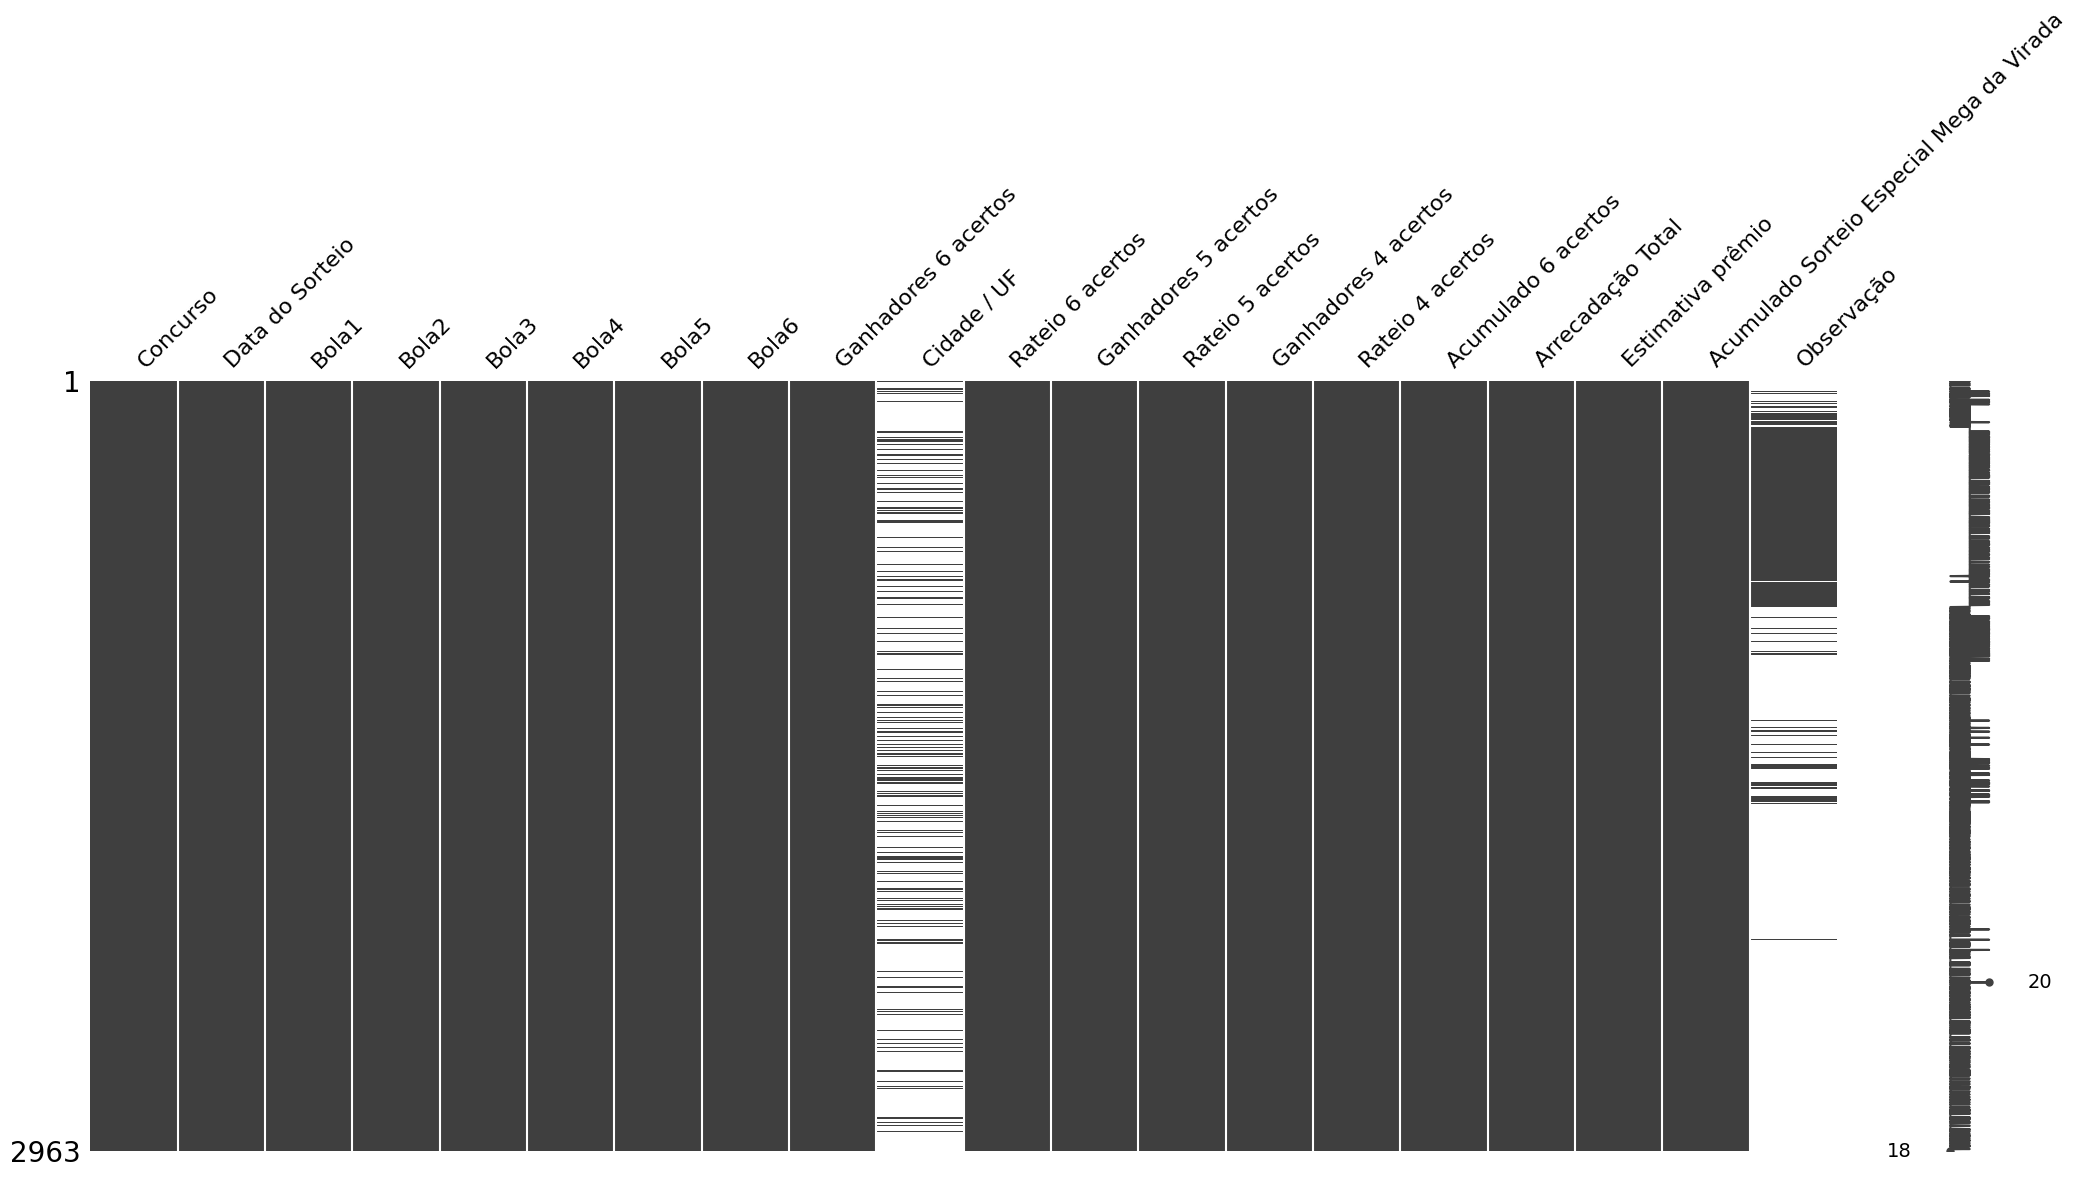

In [ ]:
import missingno as msno
msno.matrix(df)